In [76]:
import os
import re
import random

import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import albumentations as A


In [77]:
BASE_DATA_DIR = f"./data/word_nglegena_20260102_155715"
CSV_PATH = f"{BASE_DATA_DIR}/label.csv"
IMG_DIR = f"{BASE_DATA_DIR}/image"
CSV_AUG_PATH = f"{BASE_DATA_DIR}/label_aug.csv"
IMG_AUG_DIR = f"{BASE_DATA_DIR}/image_aug"

AUG_PER_IMAGE = 2


In [78]:
# def morph_gradient(img, **kwargs):
#     if img.ndim == 3:
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
#     grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

#     return cv2.addWeighted(img, 0.85, grad, 0.15, 0)


# def skeletonize(img, **kwargs):
#     if img.ndim == 3:
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#     _, bin_img = cv2.threshold(
#         img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
#     )

#     skel = np.zeros(bin_img.shape, np.uint8)
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#     temp = bin_img.copy()

#     while True:
#         eroded = cv2.erode(temp, kernel)
#         opened = cv2.dilate(eroded, kernel)
#         skel |= cv2.subtract(temp, opened)
#         temp = eroded.copy()
#         if cv2.countNonZero(temp) == 0:
#             break

#     return cv2.bitwise_not(skel)


# def thinning(img, **kwargs):
#     if img.ndim == 3:
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#     return cv2.dilate(img, kernel, iterations=2)


# def thickening(img, **kwargs):
#     if img.ndim == 3:
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#     return cv2.erode(img, kernel, iterations=2)


# def local_occlusion(img, max_patches=60, patch_size=12, fill=255, **kwargs):
#     h, w = img.shape[:2]
#     out = img.copy()

#     for _ in range(np.random.randint(1, max_patches + 1)):
#         x = np.random.randint(0, max(1, w - patch_size))
#         y = np.random.randint(0, max(1, h - patch_size))
#         out[y:y+patch_size, x:x+patch_size] = fill

#     return out


# def random_padding(img, max_pad=60, **kwargs):
#     if len(img.shape) == 3:
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     if img.dtype != np.uint8:
#         if img.max() <= 1.1:
#             img = (img * 255).astype(np.uint8)
#         else:
#             img = img.astype(np.uint8)

#     fill_value = 255 

#     pad_left = np.random.randint(0, max_pad + 1)
#     pad_right = np.random.randint(0, max_pad + 1)
#     pad_top = np.random.randint(0, max_pad // 2 + 1)
#     pad_bottom = np.random.randint(0, max_pad // 2 + 1)

#     return cv2.copyMakeBorder(
#         img,
#         pad_top,
#         pad_bottom,
#         pad_left,
#         pad_right,
#         cv2.BORDER_CONSTANT,
#         value=fill_value
#     )


# augments = [
#     ("original", A.NoOp(p=1.0)),

#     ("Padding", A.Lambda(image=random_padding, p=1.0)),

#     ("Scale", A.Affine(scale={"x": (0.3, 2.0), "y": (0.3, 2.0)}, keep_ratio=True, fit_output=False, border_mode=cv2.BORDER_CONSTANT, fill=255, p=1.0)),
#     ("Rotate", A.Affine(rotate=(-30, 30), scale=1.0, fit_output=False, border_mode=cv2.BORDER_CONSTANT, fill=255, p=1.0)),
#     ("Shear", A.Affine(shear=(-25, 25), fit_output=False, border_mode=cv2.BORDER_CONSTANT, fill=255, p=1.0)),
#     ("Perspective", A.Perspective(scale=(0.15,0.25), p=1.0, fill=255)),

#     ("Contrast", A.RandomBrightnessContrast(brightness_limit=(-1.0, 1.0), contrast_limit=(-1.0, 1.0), p=1.0)),
#     ("Gamma", A.RandomGamma(gamma_limit=(40, 160), p=1.0)),

#     ("Elastic", A.ElasticTransform(alpha=128, sigma=8, border_mode=cv2.BORDER_CONSTANT, fill=255, p=1.0)),
#     ("Grid Distortion", A.GridDistortion(num_steps=5, distort_limit=0.3, border_mode=cv2.BORDER_CONSTANT, fill=255, p=1.0)),

#     ("Morph Gradient", A.Lambda(image=morph_gradient, p=1.0)),
#     ("Skeletonization", A.Lambda(image=skeletonize, p=1.0)),
#     ("Thinning", A.Lambda(image=thinning, p=1.0)),
#     ("Thickening", A.Lambda(image=thickening, p=1.0)),

#     ("Gaussian Blur", A.GaussianBlur(blur_limit=9, p=1.0)),
#     ("Motion Blur", A.MotionBlur(blur_limit=9, p=1.0)),

#     ("Gauss Noise", A.GaussNoise(std_range=(0.5, 0.9), p=1.0)),
#     ("ISO Noise", A.Compose([A.ToRGB(p=1.0), A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.5)), A.ToGray(p=1.0)])),
#     ("Local Occlusion", A.Lambda(image=local_occlusion, p=1.0)),
# ]

# IMG_DIR = "./data/word_nglegena_20260102_155715/image"
# img = cv2.imread(f"{IMG_DIR}/{np.random.choice(os.listdir(IMG_DIR))}", cv2.IMREAD_GRAYSCALE)
# assert img is not None, "Gagal membaca gambar"

# images = []
# titles = []

# for name, aug in augments:
#     out = aug(image=img)
#     images.append(out["image"])
#     titles.append(name)

# import math
# cols = 3
# rows = math.ceil(len(images) / cols)

# plt.figure(figsize=(cols * 4, rows * 1.5), facecolor="gray")

# for i, (im, title) in enumerate(zip(images, titles)):
#     plt.subplot(rows, cols, i + 1)
#     plt.imshow(im, cmap="gray")
#     plt.title(title, fontsize=10)
#     plt.axis("off")

# plt.tight_layout()
# plt.show()


In [ ]:
def morph_gradient(img, **kwargs):
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

    return cv2.addWeighted(img, 0.85, grad, 0.15, 0)


def skeletonize(img, **kwargs):
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    _, bin_img = cv2.threshold(
        img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    skel = np.zeros(bin_img.shape, np.uint8)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    temp = bin_img.copy()

    while True:
        eroded = cv2.erode(temp, kernel)
        opened = cv2.dilate(eroded, kernel)
        skel |= cv2.subtract(temp, opened)
        temp = eroded.copy()
        if cv2.countNonZero(temp) == 0:
            break

    return cv2.bitwise_not(skel)


def thinning(img, **kwargs):
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    return cv2.dilate(img, kernel, iterations=1)


def thickening(img, **kwargs):
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    return cv2.erode(img, kernel, iterations=1)


def local_occlusion(img, max_patches=30, patch_size=6, fill=255, **kwargs):
    h, w = img.shape[:2]
    out = img.copy()

    for _ in range(np.random.randint(1, max_patches + 1)):
        x = np.random.randint(0, max(1, w - patch_size))
        y = np.random.randint(0, max(1, h - patch_size))
        out[y:y+patch_size, x:x+patch_size] = fill

    return out


def random_padding(img, max_pad=20, **kwargs):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if img.dtype != np.uint8:
        if img.max() <= 1.1:
            img = (img * 255).astype(np.uint8)
        else:
            img = img.astype(np.uint8)

    fill_value = 255 

    pad_left = np.random.randint(0, max_pad + 1)
    pad_right = np.random.randint(0, max_pad + 1)
    pad_top = np.random.randint(0, max_pad // 2 + 1)
    pad_bottom = np.random.randint(0, max_pad // 2 + 1)

    return cv2.copyMakeBorder(
        img,
        pad_top,
        pad_bottom,
        pad_left,
        pad_right,
        cv2.BORDER_CONSTANT,
        value=fill_value
    )


def threshold(img, **kwargs):
    return cv2.threshold(img, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]



transform = A.Compose([
    A.ToGray(p=1.0),
    A.PadIfNeeded(min_height=64, min_width=64, fill=255, p=1.0),

    A.Affine(
        scale={"x": (0.6, 1.4), "y": (0.8, 1.2)},
        rotate=(-3, 3),
        shear=(-3, 3),
        fit_output=True,
        border_mode=cv2.BORDER_CONSTANT,
        fill=255,
        fill_mask=255,
        p=0.7
    ),
    A.Lambda(image=random_padding, p=1.0),

    A.OneOf([
        A.Lambda(image=morph_gradient),
        A.Lambda(image=skeletonize),
        A.Lambda(image=thinning),
        A.Lambda(image=thickening),
    ], p=0.3),

    A.Compose([
        A.Perspective(
            scale=(0.01, 0.06),
            keep_size=True,
            fit_output=True,
            border_mode=cv2.BORDER_CONSTANT,
            fill=(255, 255, 255),
            fill_mask=(255, 255, 255),
            p=1.0
        ),
        A.Lambda(
            image=threshold,
            p=1.0
        )
    ], p=0.3),

    A.OneOf([
        A.ElasticTransform(
            alpha=2.0,
            sigma=30.0,
            interpolation=cv2.INTER_LINEAR,
            fill=255,
            fill_mask=255
        ),
        A.GridDistortion(
            num_steps=5,
            distort_limit=0.05,
            fill=255,
            fill_mask=255
        ),
    ], p=0.3),

    A.OneOf([
        A.GaussianBlur(blur_limit=3),
        A.MotionBlur(blur_limit=3),
    ], p=0.3),

    A.OneOf([
        A.GaussNoise(std_range=(0.1, 0.4)),
        A.Compose([
            A.ToRGB(p=1.0),
            A.ISONoise(color_shift=(0.01, 0.04), intensity=(0.1, 0.2)),
            A.ToGray(p=1.0)
        ]),
        A.Lambda(image=local_occlusion),
    ], p=0.3),

    A.RandomBrightnessContrast(
        brightness_limit=(-0.5, 0.5),
        contrast_limit=(-0.5, 0.5),
        p=0.5
    ),
    A.RandomGamma(
        gamma_limit=(80, 140),
        p=0.5
    ),
])


In [80]:
os.makedirs(IMG_AUG_DIR, exist_ok=True)
df = pd.read_csv(CSV_PATH)


augmented_rows = []

for i, row in df.iterrows():
    img_path = os.path.join(IMG_DIR, row["image"])
    image = Image.open(img_path).convert("L")

    orig_name = f"{os.path.splitext(row['image'])[0]}_orig.png"
    image.save(os.path.join(IMG_AUG_DIR, orig_name))

    orig_row = row.to_dict()
    orig_row["image"] = orig_name
    augmented_rows.append(orig_row)

    for n in range(AUG_PER_IMAGE):
        image_rgb = image.convert("RGB")
        image_np = np.array(image_rgb)

        aug = transform(image=image_np)
        aug_img_np = aug["image"]

        aug_img = Image.fromarray(aug_img_np).convert("L")

        aug_name = f"{os.path.splitext(row['image'])[0]}_aug{n+1}.png"
        aug_img.save(os.path.join(IMG_AUG_DIR, aug_name))

        aug_row = row.to_dict()
        aug_row["image"] = aug_name
        augmented_rows.append(aug_row)



df_aug = pd.DataFrame(augmented_rows)
df_aug.to_csv(CSV_AUG_PATH, index=False)

print(f"Augmented images saved to {IMG_AUG_DIR}")
print(f"CSV augmented saved to {CSV_AUG_PATH}")
print(f"Total images (original + augmented): {len(df_aug)}")


Augmented images saved to ./data/word_nglegena_20260102_155715/image_aug
CSV augmented saved to ./data/word_nglegena_20260102_155715/label_aug.csv
Total images (original + augmented): 2871


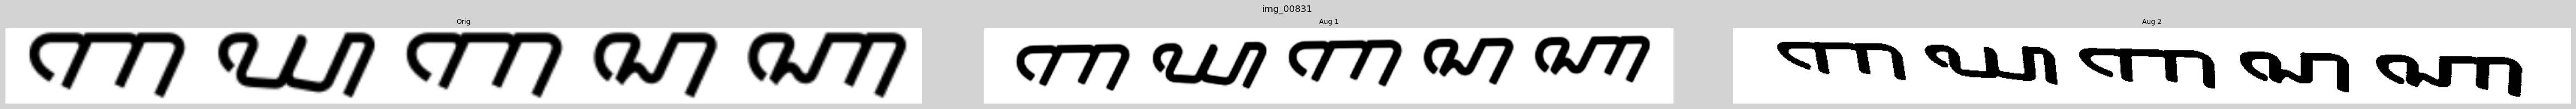

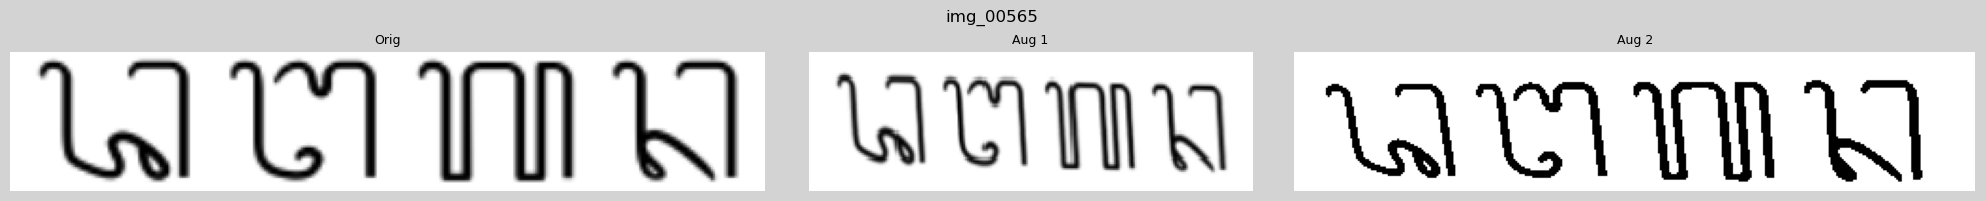

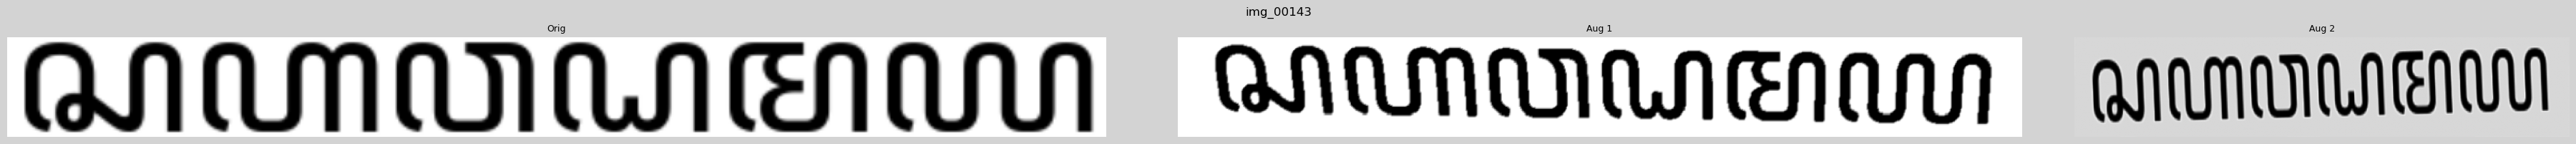

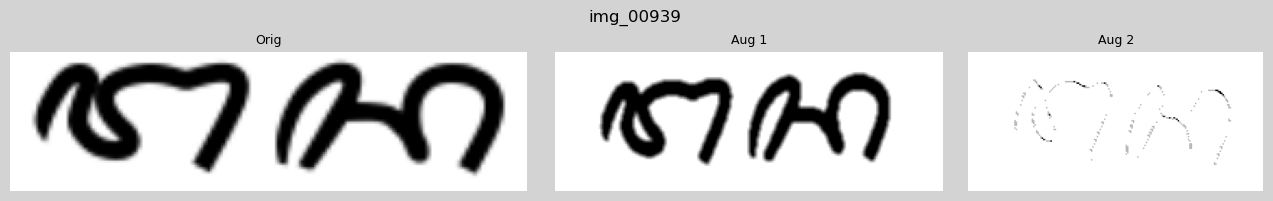

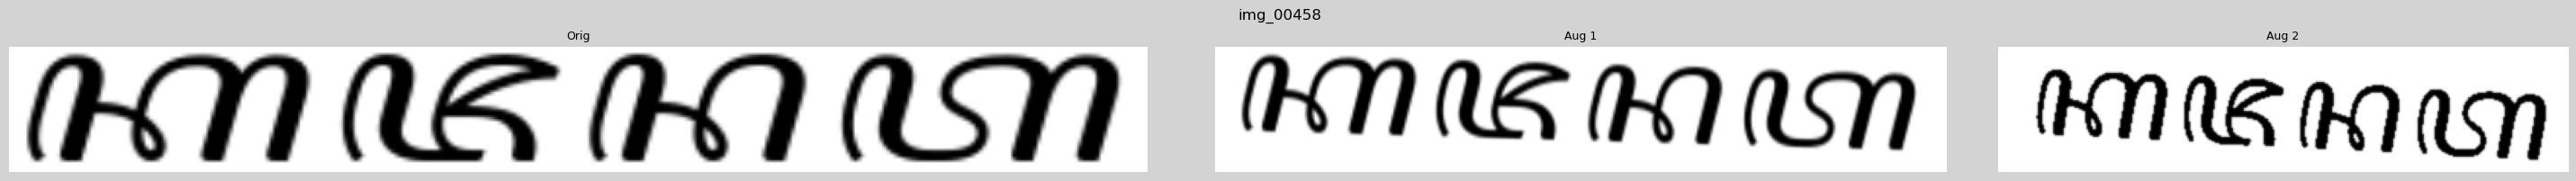

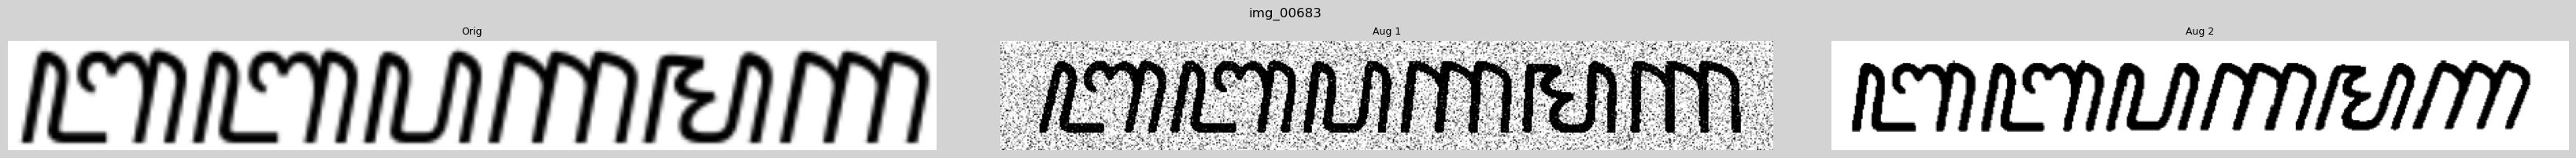

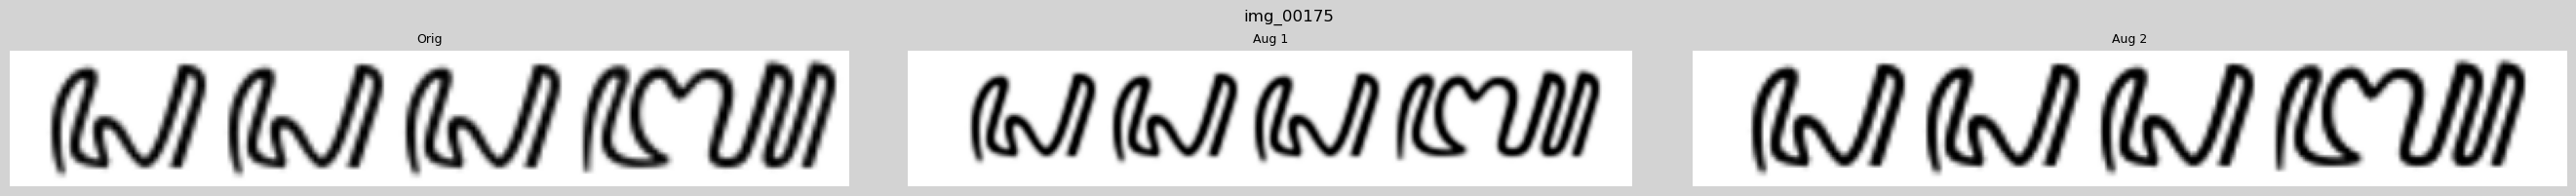

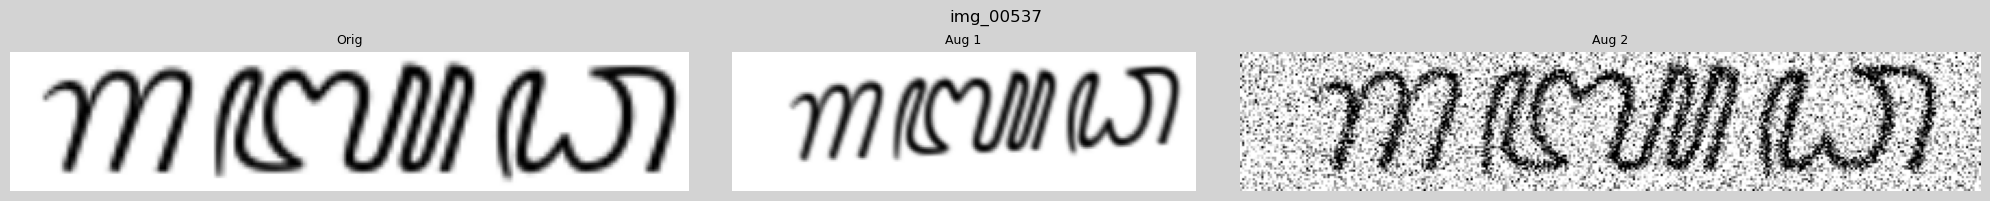

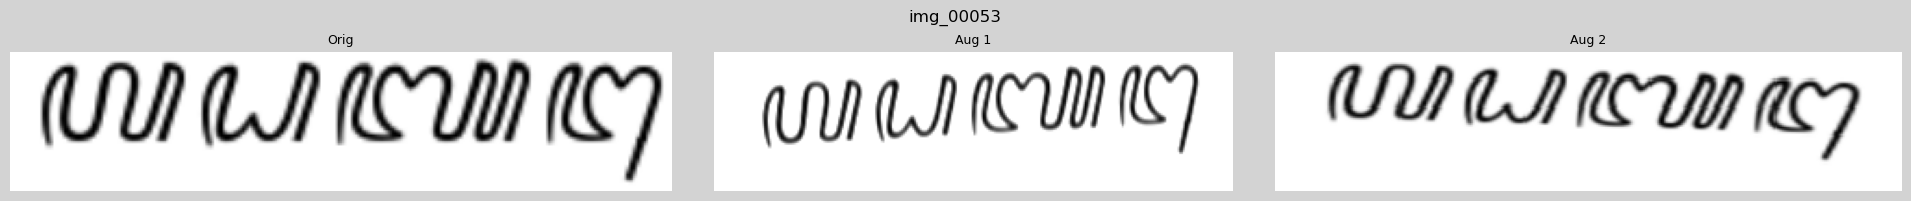

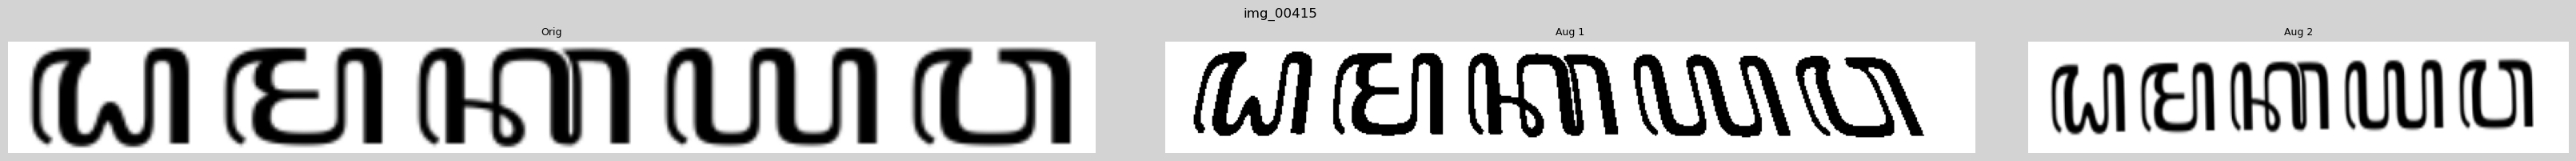

In [82]:
N_SAMPLES = 10
df_aug = pd.read_csv(CSV_AUG_PATH)

base_to_files = {}
for _, row in df_aug.iterrows():
    fname = row["image"]
    base = re.sub(r'(_orig|_aug\d+)\.png$', '', fname)
    base_to_files.setdefault(base, []).append(fname)

bases = list(base_to_files.keys())
random.shuffle(bases)
bases = bases[:min(N_SAMPLES, len(bases))]

def sort_key(fname):
    if "_orig" in fname:
        return 0
    m = re.search(r'_aug(\d+)', fname)
    return int(m.group(1)) if m else 99

for base in bases:
    files = sorted(base_to_files[base], key=sort_key)
    files = files[:3]

    loaded_images = []
    widths = []
    for fname in files:
        img_path = os.path.join(IMG_AUG_DIR, fname)
        try:
            img = Image.open(img_path).convert("L")
            w, h = img.size
            aspect_ratio = w / h
            loaded_images.append((img, fname))
            widths.append(aspect_ratio)
        except FileNotFoundError:
            loaded_images.append((None, fname))
            widths.append(1)

    fig, axes = plt.subplots(
        nrows=1, 
        ncols=len(files), 
        figsize=(sum(widths) * 1.5, 2),
        gridspec_kw={'width_ratios': widths},
        facecolor="lightgray"
    )

    if len(files) == 1:
        axes = [axes]

    # 3. Plot gambar
    for i, (img, fname) in enumerate(loaded_images):
        ax = axes[i]
        ax.axis("off")
        
        if img is not None:
            ax.imshow(img, cmap="gray")
            if "_orig" in fname:
                ax.set_title("Orig", fontsize=9)
            else:
                match = re.search(r'_aug(\d+)', fname)
                aug_id = match.group(1) if match else "?"
                ax.set_title(f"Aug {aug_id}", fontsize=9)
        else:
            ax.set_title("Missing", fontsize=9)

    fig.suptitle(base, fontsize=12)
    plt.tight_layout()
    plt.show()